# Q1 Explain the importance of weight initialization in artificial neural networks. Why is it necessary to initialize the weights carefully

Importance of Weight Initialization in Artificial Neural Networks:

Avoiding Symmetry Issues:

Proper weight initialization helps break the symmetry in the network. If all weights are initialized to the same value, each neuron in a given layer will learn the same features during training, leading to redundancy.
Facilitating Convergence:

Well-initialized weights help the network converge faster during training. Proper initialization provides a starting point for optimization algorithms, making it easier for them to find a suitable solution.
Preventing Vanishing or Exploding Gradients:

Careful weight initialization helps mitigate the risk of vanishing or exploding gradients. If weights are too small, gradients may vanish during backpropagation, and if they are too large, gradients may explode. This is particularly crucial in deep networks.
Stabilizing Training:

Properly initialized weights contribute to the stability of the training process. Unstable training can lead to erratic behavior, making it difficult to find an optimal set of weights.
Challenges Associated with Improper Weight Initialization:



# Q2 Describe the challenges associated with improper weight initialization. How do these issues affect model training and convergence

Challenges Associated with Improper Weight Initialization:

Vanishing Gradients:

If weights are initialized too small, the gradients during backpropagation may become extremely small, leading to slow or stalled learning.
Exploding Gradients:

If weights are initialized too large, the gradients may become extremely large, causing the model to diverge during training.
Saturation of Activation Functions:

Some activation functions have saturation regions where gradients are nearly zero. Improper initialization may cause the network to spend more time in these regions, slowing down learning.
Convergence Issues:

Improper initialization can lead to difficulties in converging to a good solution, requiring longer training times or preventing convergence altogether.

# Q3 Discuss the concept of variance and how it relates to weight initialization. Why is it crucial to consider the variance of weights during initialization

Concept of Variance and its Relation to Weight Initialization:

Variance in Initialization:

Variance refers to the spread or dispersion of values in the weight initialization. It is crucial to consider because extreme values can lead to the aforementioned issues.
Effect on Activation Outputs:

The variance of weights affects the spread of activation outputs. Too small variances may result in activations clustered around certain values, limiting the capacity of the network. Too large variances may lead to exploding activations.
Importance in Initialization Schemes:

Initialization schemes, such as He initialization or Xavier/Glorot initialization, are designed to control the variance of weights. Choosing an appropriate initialization scheme is essential to balance the variance and avoid issues during training.

# Q4 Explain the concept of zero initialization. Discuss its potential limitations and when it can be appropriate to use

Zero Initialization:

Concept:

Zero initialization involves setting all weights and biases in the neural network to zero at the beginning of the training process.
It is a straightforward initialization method, and mathematically simple.
Potential Limitations:

Symmetry Issue: All neurons in a layer will learn the same features during training if initialized to zero, leading to redundancy.
Vanishing Gradients: During backpropagation, gradients may become zero, particularly in deep networks, causing slow or stalled learning.
No Diversity: Lack of diversity in weights makes it difficult for neurons to learn different features.

Appropriate Use:

Zero initialization is not commonly used for weight initialization in deep neural networks due to its limitations.
It may be appropriate in certain cases, such as output layers for regression problems where outputs are expected to be close to zero.

# Q5 Describe the process of random initialization. How can random initialization be adjusted to mitigate potential issues like saturation or vanishing/exploding gradientsD

Random Initialization:

Process:

Random initialization involves setting weights to small random values.
Commonly, random values are drawn from a normal or uniform distribution.
This introduces diversity in the weights and helps break symmetry.
Mitigating Issues:

Avoiding Saturation: Using activation functions like ReLU can help avoid saturation issues that may arise with random initialization.
Normalization Techniques: Batch normalization can be applied to mitigate exploding or vanishing gradient problems.

# Q6 Discuss the concept of Xavier/Glorot initialization. Explain how it addresses the challenges of improper weight initialization and the underlEing theory behind it

Xavier/Glorot Initialization:

Concept:

Xavier/Glorot initialization is designed to maintain the variance of activations across layers during forward and backward passes.
The weights are initialized by drawing values from a normal distribution with mean 0 and variance 
1
number of input neurons
number of input neurons
1

 .
Advantages:

Addresses the vanishing/exploding gradient problems by carefully balancing the variance.
Particularly effective for sigmoid and hyperbolic tangent (tanh) activation functions.

# Q7 Explain the concept of He initialization. How does it differ from Xavier initialization, and when is it preferred

He Initialization:

Concept:

He initialization is similar to Xavier/Glorot initialization but adjusts the variance to 
2
number of input neurons
number of input neurons
2
​
 .
Specifically tailored for ReLU and its variants.
Differences from Xavier:

He initialization uses a higher variance, acknowledging that ReLU neurons can benefit from slightly larger initial weights.
When to Prefer He Initialization:

He initialization is preferred when using ReLU or its variants as activation functions.
It helps mitigate the issue of dead neurons (neurons that always output zero) associated with ReLU when initialized with Xavier/Glorot.

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2023-11-23 06:38:49.273451: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-23 06:38:49.340863: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-23 06:38:49.340927: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-23 06:38:49.342322: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-23 06:38:49.351927: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-23 06:38:49.352729: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [13]:
data,labels= make_moons(200,noise=0.2,random_state=2)


In [17]:
from sklearn.model_selection import train_test_split
x_train_full, x_test, y_train_full, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
x_valid,x_train = train_test_split(x_train_full,test_size=0.4,random_state=42)
y_valid,y_train = train_test_split(y_train_full,test_size=0.4,random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_valid_scaled = scaler.transform(x_valid)

In [27]:
model1 = Sequential()
model1.add(Dense(10,activation="relu",kernel_initializer="he_normal",input_dim=2))
model1.add(Dense(10,activation="relu",kernel_initializer="he_normal"))
model1.add(Dense(1,activation="sigmoid") )         

In [28]:
model1.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [30]:
he_normal_history = model1.fit(x_train_scaled,y_train,epochs=50,validation_split=0.2,verbose=0)

In [24]:
pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 45.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [25]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 10s 1ms/step


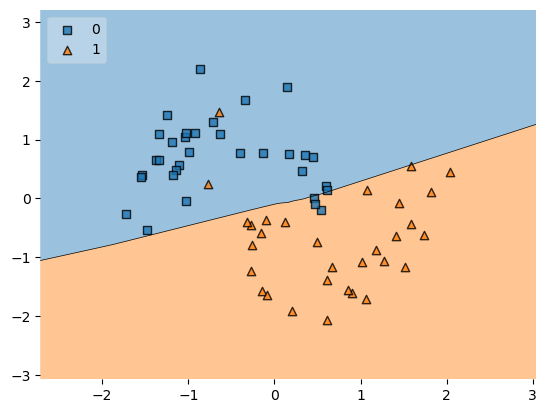

In [31]:
plot_decision_regions(x_train_scaled,y_train.astype("int"),clf=model1,legend=2)
plt.show()

In [41]:


model2 = Sequential()
model2.add(Dense(10, activation="tanh", kernel_initializer="glorot_uniform", input_dim=2))
model2.add(Dense(10, activation="tanh", kernel_initializer="glorot_uniform"))
model2.add(Dense(1, activation="sigmoid"))


In [42]:
model2.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [43]:
xavier_history = model2.fit(x_train_scaled,y_train,epochs=50,validation_split=0.2,verbose=0)

9600/9600 [==============================] - 10s 1ms/step


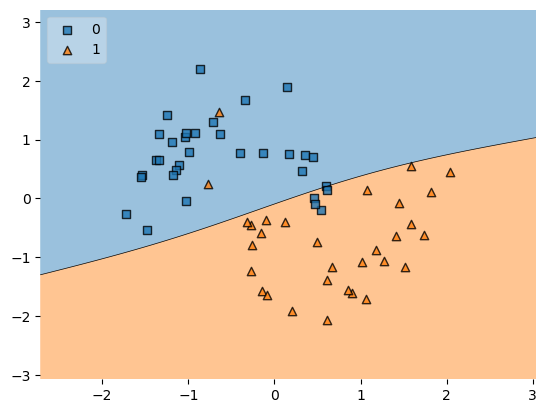

In [44]:
plot_decision_regions(x_train_scaled,y_train.astype("int"),clf=model2,legend=2)
plt.show()

In [46]:

model3 = Sequential()
model3.add(Dense(10, activation="relu", kernel_initializer="zeros", input_dim=2))
model3.add(Dense(10, activation="relu", kernel_initializer="zeros"))
model3.add(Dense(1, activation="sigmoid"))


In [47]:
model3.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [48]:
zeroes_history = model3.fit(x_train_scaled,y_train,epochs=50,validation_split=0.2,verbose=0)

9600/9600 [==============================] - 10s 1ms/step


/opt/conda/lib/python3.10/site-packages/mlxtend/plotting/decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


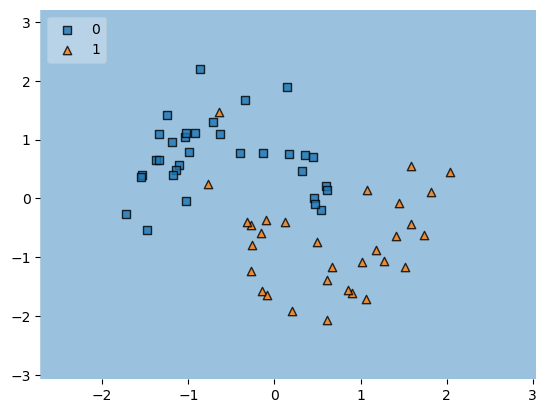

In [49]:
plot_decision_regions(x_train_scaled,y_train.astype("int"),clf=model3,legend=2)
plt.show()

In [53]:

model4 = Sequential()
model4.add(Dense(10, activation="relu", kernel_initializer="random_normal", input_dim=2))
model4.add(Dense(10, activation="relu", kernel_initializer="random_normal"))
model4.add(Dense(1, activation="sigmoid"))


In [54]:
model4.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [55]:
random_history = model4.fit(x_train_scaled,y_train,epochs=50,validation_split=0.2,verbose=0)

9600/9600 [==============================] - 10s 1ms/step


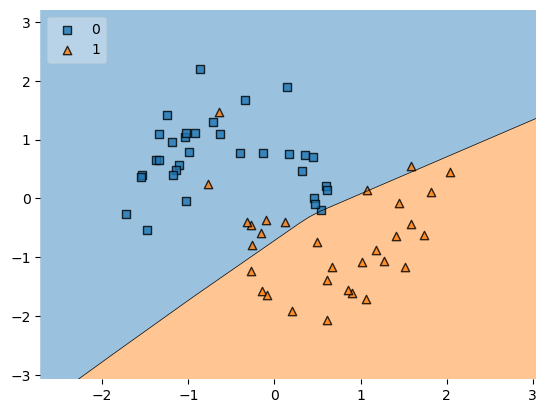

In [57]:
plot_decision_regions(x_train_scaled,y_train.astype("int"),clf=model4,legend=2)
plt.show()

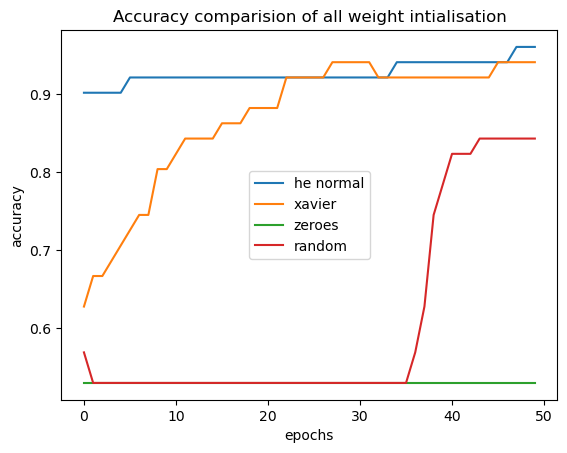

In [60]:
plt.plot(he_normal_history.history["accuracy"],label="he normal")
plt.plot(xavier_history.history["accuracy"],label="xavier")
plt.plot(zeroes_history.history["accuracy"],label="zeroes")
plt.plot(random_history.history["accuracy"],label="random")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy comparision of all weight intialisation")
plt.legend()
plt.show()

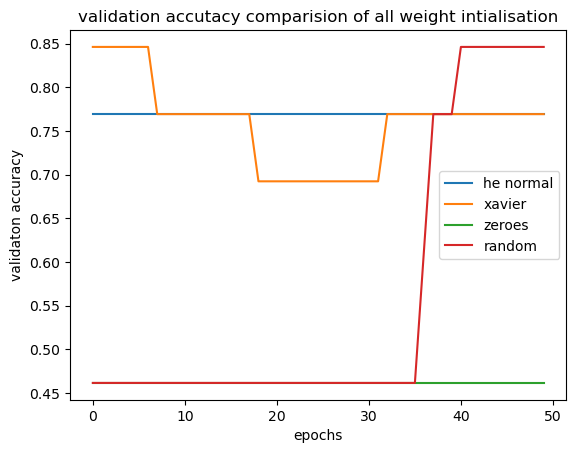

In [64]:
plt.plot(he_normal_history.history["val_accuracy"],label="he normal")
plt.plot(xavier_history.history["val_accuracy"],label="xavier")
plt.plot(zeroes_history.history["val_accuracy"],label="zeroes")
plt.plot(random_history.history["val_accuracy"],label="random")
plt.xlabel("epochs")
plt.ylabel("validaton accuracy")
plt.title("validation accutacy comparision of all weight intialisation")
plt.legend()
plt.show()

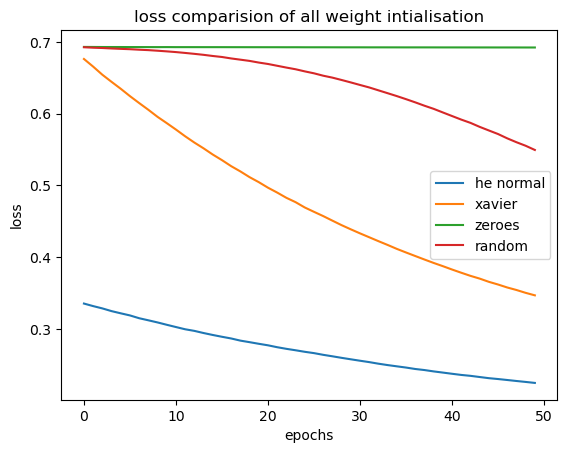

In [62]:
plt.plot(he_normal_history.history["loss"],label="he normal")
plt.plot(xavier_history.history["loss"],label="xavier")
plt.plot(zeroes_history.history["loss"],label="zeroes")
plt.plot(random_history.history["loss"],label="random")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("loss comparision of all weight intialisation")
plt.legend()
plt.show()

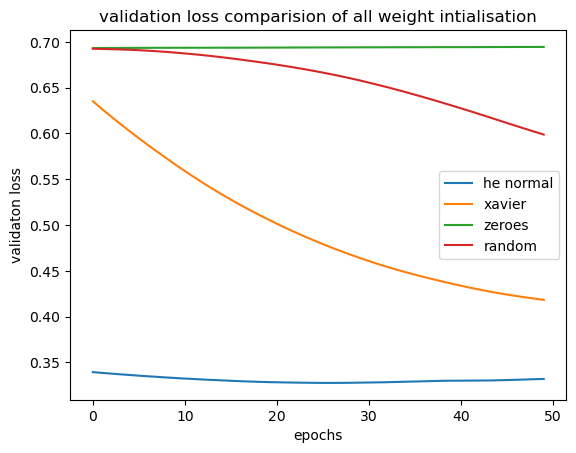

In [63]:
plt.plot(he_normal_history.history["val_loss"],label="he normal")
plt.plot(xavier_history.history["val_loss"],label="xavier")
plt.plot(zeroes_history.history["val_loss"],label="zeroes")
plt.plot(random_history.history["val_loss"],label="random")
plt.xlabel("epochs")
plt.ylabel("validaton loss")
plt.title("validation loss comparision of all weight intialisation")
plt.legend()
plt.show()

# Q9Discuss the considerations and tradeoffs when choosing the appropriate weight initialization technique for a given neural network architecture and task.